# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
pd.set_option('display.max_rows',100)
data.head().T

In [0]:
from sklearn.model_selection import train_test_split
X=data

train, test= train_test_split(X,test_size=.5)

In [0]:
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

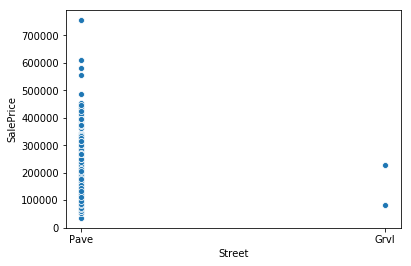

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = train.replace({np.nan:0})
train.Street.unique()
sns.scatterplot(x='Street',y='SalePrice',data=train)
train['Street'] = train['Street'].replace({'Pave':2,'Grvl':1})


NameError: ignored

In [0]:
target = 'SalePrice'
numeric_columns = data.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=data, alpha=0.2)
    plt.show()
    
#OverallQual,YearBuilt,2ndFlrSF - zeros,

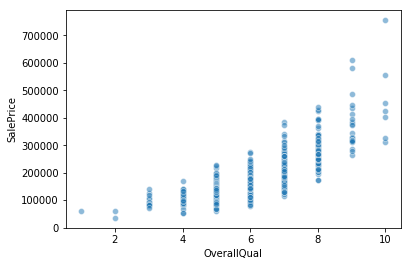

In [23]:
train = train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<200000)].index)
sns.scatterplot(x='OverallQual',y=target,data=train,alpha=.5)

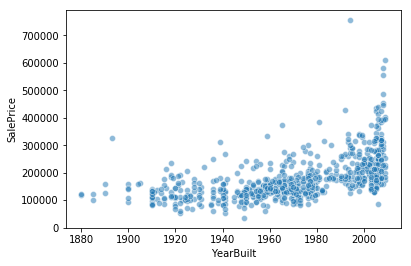

In [14]:
sns.scatterplot(x='YearBuilt',y=target,data=train,alpha=.5)

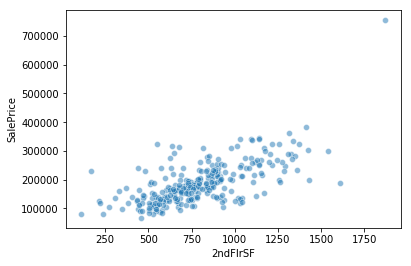

In [24]:
train = train.drop(train[(train['2ndFlrSF']<1500) & (train['SalePrice']>400000)].index)
train['2ndFlrSF']= train['2ndFlrSF'].replace({0:np.nan})
sns.scatterplot(x='2ndFlrSF',y=target,data=train,alpha=.5)


 mu = 178987.10 and sigma = 74815.80



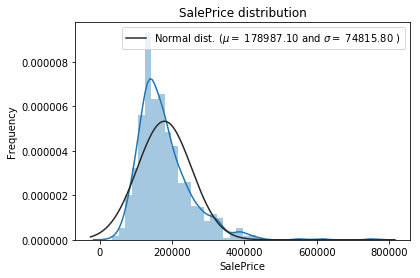

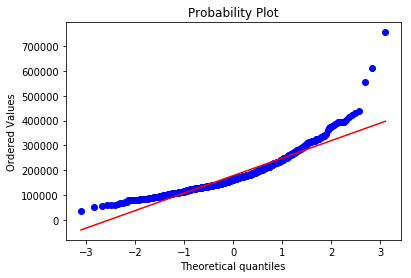

In [28]:
from scipy.stats import norm, skew
from scipy import stats
sns.distplot(train['SalePrice'], fit=norm)

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

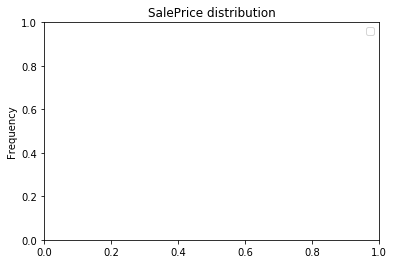

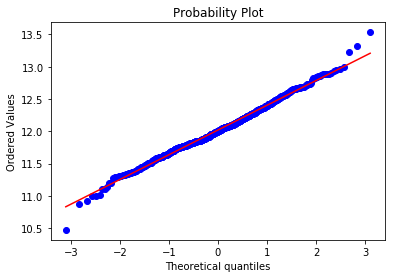

In [29]:
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data